A program to calculating the closest pair of dots in a plane<br>
This is the entire psudocode by book Algorithms Illuminated

Input: two copies Px and Py of n $ 2 points in the<br>
plane, sorted by x- and y-coordinate, respectively.<br>
Output: the pair pi, pj of distinct points with smallest Euclidean distance between them.<br>
// base case of <= 3 points omitted<br>
1 Lx := first half of Px, sorted by x-coordinate<br>
2 L y := first half of Px, sorted by y-coordinate<br>
3 Rx := second half of Px, sorted by x-coordinate<br>
4 R y := second half of Px, sorted by y-coordinate<br>
5 (l1, l2) := ClosestPair(Lx, Ly) // best left pair<br>
6 (r1, r2) := ClosestPair(Rx, Ry) // best right pair<br>
7 ^ := min{d(l1, l2), d(r1, r2)}<br>
8 (s1, s2) := ClosestSplitPair(Px, Py, ^)<br>
9 return best of (l1, l2), (r1, r2), (s1, s2)<br>

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
A = [(0,0),(9,1),(-6,5),(1,8),(2,-11),(3,2)]
X = [i[0] for i in A]
Y = [i[1] for i in A]

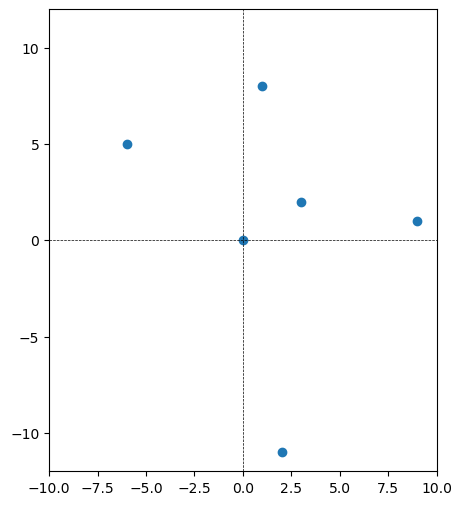

In [19]:
fig, ax = plt.subplots(figsize=(5,6)) # in the proportion of (xlim and ylim)
ax.scatter(x=X, y=Y)

ax.set_ylim((-12,12))
ax.set_xlim((-10,10))
ax.axhline(0, color = 'k', linestyle='--', linewidth='0.5')
ax.axvline(0, color = 'k', linestyle='--', linewidth='0.5')
plt.show()

Let's sort the entries by x-coordinate and y-coordinate


In [20]:
P_x = sorted(A, key=lambda x: x[0])
P_y = sorted(A, key=lambda x: x[1])
print(P_x)
print(P_y)

[(-6, 5), (0, 0), (1, 8), (2, -11), (3, 2), (9, 1)]
[(2, -11), (0, 0), (9, 1), (3, 2), (-6, 5), (1, 8)]


We want to split the entries into left half and right half
1) L_x := first half of Px, sorted by x-coordinate
2) L_y := first half of Px, sorted by y-coordinate
3) R_x := second half of Px, sorted by x-coordinate
4) R_y := second half of Px, sorted by y-coordinate

SIMPLYFING ASSUMPTION: length of A is EVEN

In [21]:
L_x = P_x[:len(P_x)//2]
# L_y = P_y[:len(P_x)//2]       THIS IS NOT TRUE
L_y = sorted(L_x, key=lambda x: x[1])

R_x = P_x[len(P_x)//2:]
# R_y = P_y[len(P_x)//2:]       THIS IS NOT TRUE
R_y = sorted(R_x, key=lambda x: x[1])

print("L_x:", L_x)
print("L_y:", L_y)
print("R_x:", R_x)
print("R_y:", R_y)


L_x: [(-6, 5), (0, 0), (1, 8)]
L_y: [(0, 0), (-6, 5), (1, 8)]
R_x: [(2, -11), (3, 2), (9, 1)]
R_y: [(2, -11), (9, 1), (3, 2)]


let me show U what should V calculate in our first recursion

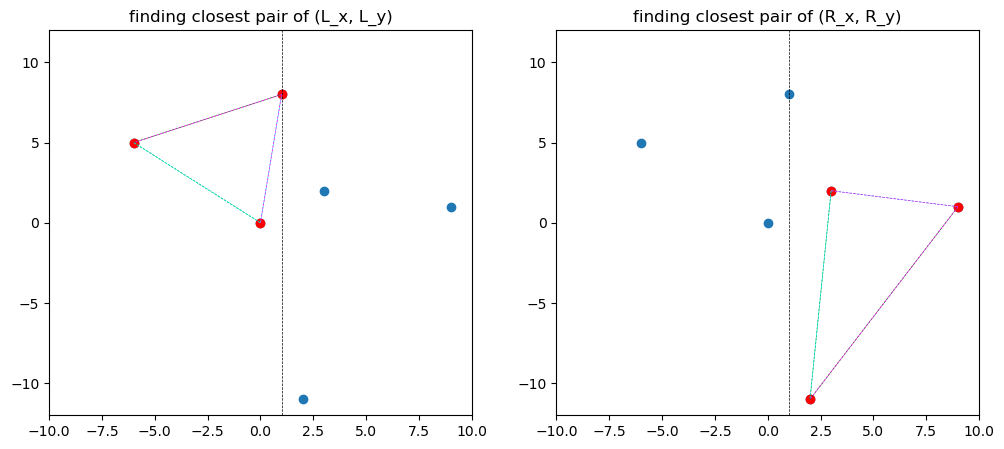

In [22]:
fig, (ax1, ax2) = plt.subplots(figsize=(12,5),ncols=2)
# Pay attention to intersection (0,0)
ax1.scatter(x=X, y=Y)
ax1.axvline(L_x[-1][0], color = 'k', linestyle='--', linewidth='0.5')
ax1.set_ylim((-12,12))
ax1.set_xlim((-10,10))
ax2.scatter(x=X, y=Y)
ax2.axvline(L_x[-1][0], color = 'k', linestyle='--', linewidth='0.5')
ax2.set_ylim((-12,12))
ax2.set_xlim((-10,10))

ax1.scatter(x=[i[0] for i in L_y], y=[i[1] for i in L_y], color='r')

colors = ['green','cyan', 'magenta']
for dot_iter in range(len(L_x)):
    dot1 = L_x[dot_iter]
    color = colors[dot_iter]
    for dot2 in L_y:
        if dot1 != dot2:
            ax1.plot([dot1[0], dot2[0]], [dot1[1], dot2[1]], linestyle='--', linewidth=0.5, color=color)

ax2.scatter(x=[i[0] for i in R_y], y=[i[1] for i in R_y], color='r')

for dot_iter in range(len(R_x)):
    dot1 = R_x[dot_iter]
    color = colors[dot_iter]
    for dot2 in R_y:
        if dot1 != dot2:
            ax2.plot([dot1[0], dot2[0]], [dot1[1], dot2[1]], linestyle='--', linewidth=0.5, color=color)

ax1.set_title('finding closest pair of (L_x, L_y)')
ax2.set_title('finding closest pair of (R_x, R_y)')
plt.show()

In [23]:
def count_d(dot1, dot2):
    return np.power((dot1[0] - dot2[0])**2 + (dot1[1] - dot2[1])**2,0.5)


In [24]:
#initialize the closest dots
l1 = l2 = None
#initialize the distance
dists = []
# make this small after each iter
l_best_d = 1000000    #np.inf maybe

for dot1 in L_x:
    for dot2 in L_y:
        if dot1 != dot2:
            d = count_d(dot1, dot2)
            dists.append(d)
            if d < l_best_d:
                l_best_d = d
                l1 = dot1
                l2 = dot2

print(l1,l2,l_best_d)

(-6, 5) (1, 8) 7.615773105863909


In [25]:
r1 = r2 = None
dists = []
r_best_d = 1000000    #np.inf maybe

for dot1 in R_x:
    for dot2 in R_y:
        if dot1 != dot2:
            d = count_d(dot1, dot2)
            dists.append(d)
            if d < r_best_d:
                r_best_d = d
                r1 = dot1
                r2 = dot2
print(r1,r2,r_best_d)                

(3, 2) (9, 1) 6.082762530298219


In [26]:
print(f"l1: {l1}   l2:{r1}     best_left_distance :   {l_best_d}")
print(f"r1: {l1}   r2:{r2}     best_right_distance:   {r_best_d}")
best_d = min(l_best_d, r_best_d)
print(f"best distance: {best_d}")

l1: (-6, 5)   l2:(3, 2)     best_left_distance :   7.615773105863909
r1: (-6, 5)   r2:(9, 1)     best_right_distance:   6.082762530298219
best distance: 6.082762530298219


So V choose the r1 and r2 pair and set our delta to 6.08

In [27]:
mid_dot = P_x[len(P_x)//2 - 1]

# let's calculate the range of x with delta=6.08
l_bound = mid_dot[0] - best_d 
r_bound = mid_dot[0] + best_d 
P_x

S_y = [dot for dot in P_x if dot[0]>l_bound and dot[0]<r_bound]
S_y = sorted(S_y, key=lambda x: x[1])
S_y




[(2, -11), (0, 0), (3, 2), (1, 8)]

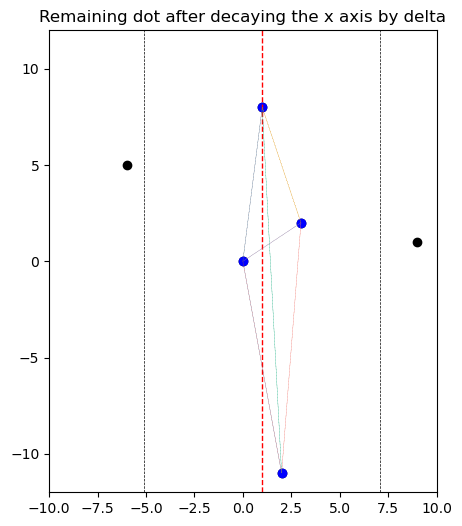

In [38]:
fig, ax = plt.subplots(figsize=(5,6)) # in the proportion of (xlim and ylim)
ax.scatter(x=X, y=Y, color='k')

ax.set_ylim((-12,12))
ax.set_xlim((-10,10))
ax.axvline(mid_dot[0], color = 'r', linestyle='--', linewidth='1')
ax.axvline(l_bound, color = 'k', linestyle='--', linewidth='0.5')
ax.axvline(r_bound, color = 'k', linestyle='--', linewidth='0.5')
ax.set_title('Remaining dot after decaying the x axis by delta')

for dot1 in S_y:
    for dot2 in S_y:
        if dot1 != dot2:
            ax.plot([dot1[0], dot2[0]], [dot1[1], dot2[1]], linestyle='--', linewidth=0.2)


ax.scatter([i[0] for i in S_y], [i[1] for i in S_y], color = 'blue')
plt.show()

- One thing is very important in this stage
1) First we define our S_y set of points, in the period (x-delta, x+delta), sorted by y-coordinate
2) Then we start from the most bottom point and check the distance of that and `only 7 points above`<br>
It has a geometrical solution that we only need to check just 7 points to find the best pairs' distance

In [29]:
q1 = q2 = None
dists = []
q_best_d = 1000000    #np.inf maybe

# We know that the dots are just 4 in the S_y set
for dot1 in S_y:
    for dot2 in S_y:
        if dot1 != dot2:
            d = count_d(dot1, dot2)
            dists.append(d)
            if d < q_best_d:
                q_best_d = d
                q1 = dot1
                q2 = dot2
print(q1,q2,q_best_d)

(0, 0) (3, 2) 3.605551275463989


since the q_best distance is smaller than the previous best_distance<br>
V figure out that the best distance has been found and it's `3.61`

### So let's implement the entire algorithm

In [31]:
# Optional cell to understand more about the cell below

# l = 10
# for i in range(l):
#     for j in range(i+1, min(i+8,l)):
#         print(i,j)

In [37]:
def calulate_distance(p1, p2):
    return np.power((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2,0.5)


def bruteforce_closest_pair(points):
    best_distance = np.inf
    best_pairs = None
    n = len(points)
    for i in range(n):
        for j in range(i+1,n):
            p1 = points[i]
            p2 = points[j]
            distance = calulate_distance(p1,p2)
            if distance < best_distance:
                best_distance = distance
                best_pairs = [p1,p2]
    return best_pairs, best_distance
    
def clossest_split_pair(points, delta):
    mid_point = points[len(points)//2-1]

    l_bound = mid_point[0] - delta
    r_bound = mid_point[0] + delta

    S_y = [point for point in points if point[0]>=l_bound and point[0]<=r_bound]
    S_y = sorted(S_y, key=lambda x: x[1])
    l = len(S_y)

    s_best_distance = delta
    s_best_pairs = None
    
    # let me explain that we only need to check the distance between point_i and the 7 above if they exist
    # if there are not 7 points above, we check as many as it possible, e.g. 3
    # try to run the optional code above to get more intuition
    for i in range(l):
        for j in range(i+1, min(i+8,l)):
            p1 = S_y[i]
            p2 = S_y[j]
            distance = calulate_distance(p1,p2)
            if distance < s_best_distance:
                s_best_distance = distance
                s_best_pairs = [p1,p2]

    return s_best_pairs, s_best_distance
    

def recursive_closest_pair(points):
    P_x = sorted(points, key=lambda x: x[0])      # points sorted by their x coordinate
    P_y = sorted(points, key=lambda x: x[1])      # points sorted by their y coordinate

    # base case
    if len(points) <=3: 
        best_pairs, best_distance= bruteforce_closest_pair(points)
        return best_pairs, best_distance

    L_x = P_x[:len(P_x)//2]                       # first half of P_x sorted by x-coordinate
    L_y = sorted(L_x, key=lambda x: x[1])         # first half of P_x sorted by y-coordinate or U can use the line below
    # L_y = [p for p in P_y if p[0] <= P_y[len(P_y)//2-1]]     
    R_x = P_x[len(P_x)//2:]                       # second half of P_x sorted by x-coordinate
    R_y = sorted(R_x, key=lambda x: x[1])         # second half of P_x sorted by y-coordinate

    l_best_pairs , l_best_distance = recursive_closest_pair(L_x)
    r_best_pairs , r_best_distance = recursive_closest_pair(R_x)
    
    delta = min(l_best_distance, r_best_distance)

    s_best_pairs, s_best_distance = clossest_split_pair(P_x, delta)

    best_distance = min(delta, s_best_distance)

    # Final Return

    if s_best_distance == None:
        if best_distance == l_best_distance:
            return l_best_pairs , l_best_distance
        elif best_distance == r_best_distance:
            return r_best_pairs , r_best_distance
    else:        
        if best_distance == l_best_distance:
            return l_best_pairs , l_best_distance
        elif best_distance == r_best_distance:
            return r_best_pairs , r_best_distance
        elif best_distance == s_best_distance:
            return s_best_pairs , s_best_distance

In [35]:
recursive_closest_pair(A)

([(0, 0), (3, 2)], 3.605551275463989)

# THIS IS IT :)